# Tasks

[https://moodle.ost.ch/pluginfile.php/426498/mod_resource/content/1/AiAp23_MiniProj1.pdf](https://moodle.ost.ch/pluginfile.php/426498/mod_resource/content/1/AiAp23_MiniProj1.pdf)

---

# Miniproject 1 
# B.I. Bartificial Intelligence - Image Classifier for *The Simpsons*
![](https://static.wikia.nocookie.net/simpsons/images/8/8c/Treehouse_of_Horror_XVI_%28Promo_Picture%29_2.jpg/revision/latest?cb=20120625110202) |  ![](https://static.wikia.nocookie.net/simpsons/images/a/a9/B.I._Bartificial_Intelligence.jpg/revision/latest?cb=20121103214906)
:---:|:---:

> Authors 🗒
> * Kyra Maag (kyra.maag@ost.ch)
> * Nico Fehr (nico.fehr@ost.ch)

Kyra: Einleitung

For the first Miniproject we decided to train an image classifier for images of characters from the famous series "The Simpsons". The classifier can detect and predict the character shown on a given image.



## Dataset

Nico

### Source
The dataset used in this miniproject was available on kaggle.com. The dataset contains 20 folders (one per each character in the series) with around 400-2000 images in each one.

### Pre-processing
We reduced the dataset significantly to only work with 8 classes which will make the training faster.

- test daten vorbereitet (ordnerstruktur)
- train daten reduziert auf 8 klassen

### Key characteristics
- ordneranzahl und anzahl bilder beschreiben

## Architecture 1 (simple, underfitted)

### Tasks
* [ ] Define and train deep convolutional network (multi-class) with keras
* [x] Not more than 3 layers, no more than 5'000 trainable parameters
* [x] Network should underfit
* [ ] Plot loss and accuracy evolvement
* [ ] sufficient nr of epochs
* [ ] training loss should converge
* [ ] Plot confusion matrix
* [ ] Discussion

What is cross validation in the sense of keras? Is it the split of training data in a training part and validation part.

In [130]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

print(tf.__version__)
print(np.__version__)

2.10.1
1.20.3


In [131]:
classification_labels = ["Bart Simpson",
          "Charles Montgomery Burns",
          "Homer Simpson",
          "Krusty The Clown",
          "Lisa Simpson",
          "Marge Simpson",
          "Moe Szyslak",
          "Ned Flanders",]

In [132]:
train_directory = 'simpsons-dataset/train'
test_directory = 'simpsons-dataset/test'

In [234]:
image_size = (50, 50)

train_data, validation_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    seed=1234,
    subset='both',
    image_size=image_size,
    color_mode='rgb',
    labels='inferred',
    label_mode='int',
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    image_size=image_size,
    color_mode='rgb',
    labels='inferred',
    label_mode='int'
)

Found 11538 files belonging to 8 classes.
Using 9231 files for training.
Using 2307 files for validation.
Found 397 files belonging to 8 classes.


### Exploring the data

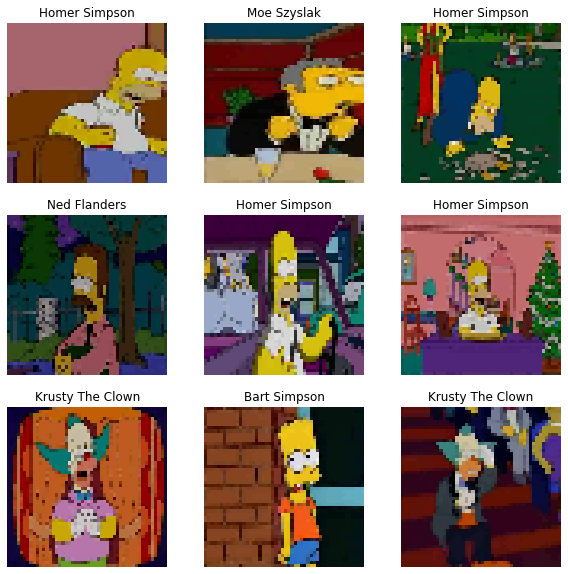

In [195]:
plt.figure(figsize=(10,10))

for images, labels in train_data.take(1):
  for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(classification_labels[int(labels[i])])
      plt.axis("off")


Performance

In [196]:
train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [197]:
input_shape = image_size + (3, )
print(input_shape)
num_classes = len(classification_labels)

(50, 50, 3)


In [205]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Rescaling(1./255),
    layers.Conv2D(2, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(5, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes),
])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_111 (Conv2D)         (None, 48, 48, 2)         56        
                                                                 
 max_pooling2d_111 (MaxPooli  (None, 24, 24, 2)        0         
 ng2D)                                                           
                                                                 
 conv2d_112 (Conv2D)         (None, 22, 22, 5)         95        
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 11, 11, 5)        0         
 ng2D)                                                           
                                                                 
 flatten_53 (Flatten)        (None, 605)             

In [206]:
#callbacks = [
#    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
#]

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

epochs = 50
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs,
    #callbacks=callbacks
)

Epoch 1/50
289/289 [==============================] - 2s 5ms/step - loss: 1.9008 - accuracy: 0.2759 - val_loss: 1.6400 - val_accuracy: 0.4114
Epoch 2/50
289/289 [==============================] - 1s 4ms/step - loss: 1.5339 - accuracy: 0.4586 - val_loss: 1.4888 - val_accuracy: 0.4885
Epoch 3/50
289/289 [==============================] - 1s 4ms/step - loss: 1.4376 - accuracy: 0.4999 - val_loss: 1.4352 - val_accuracy: 0.5154
Epoch 4/50
289/289 [==============================] - 1s 4ms/step - loss: 1.3846 - accuracy: 0.5230 - val_loss: 1.4016 - val_accuracy: 0.5241
Epoch 5/50
289/289 [==============================] - 1s 4ms/step - loss: 1.3454 - accuracy: 0.5428 - val_loss: 1.3769 - val_accuracy: 0.5392
Epoch 6/50
289/289 [==============================] - 1s 4ms/step - loss: 1.3129 - accuracy: 0.5562 - val_loss: 1.3578 - val_accuracy: 0.5501
Epoch 7/50
289/289 [==============================] - 1s 4ms/step - loss: 1.2851 - accuracy: 0.5687 - val_loss: 1.3423 - val_accuracy: 0.5574
Epoch 

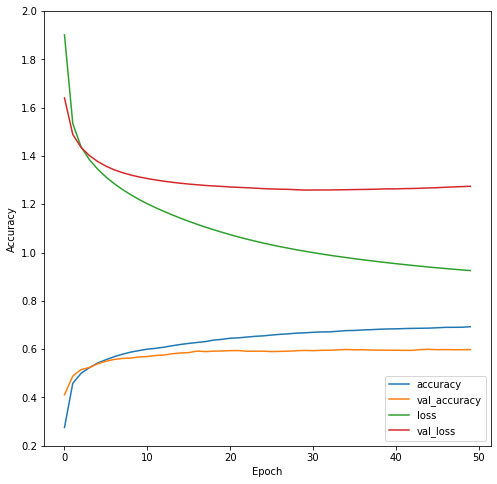

In [207]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 2])
plt.legend(loc='lower right')

In [236]:
test_loss, test_accuracy = model.evaluate(test_data, verbose=2)

13/13 - 0s - loss: 0.4858 - accuracy: 0.8539 - 238ms/epoch - 18ms/step


In [237]:
#probability_model = tf.keras.Sequential([model, layers.Softmax()])
probability_model = model
prediction_labels = probability_model.predict(test_data, verbose=2)

13/13 - 0s - 257ms/epoch - 20ms/step


In [238]:
prediction_labels = np.array([np.argmax(x) for x in prediction_labels])

In [239]:
true_labels = np.concatenate([y for x, y in test_data], axis=0)

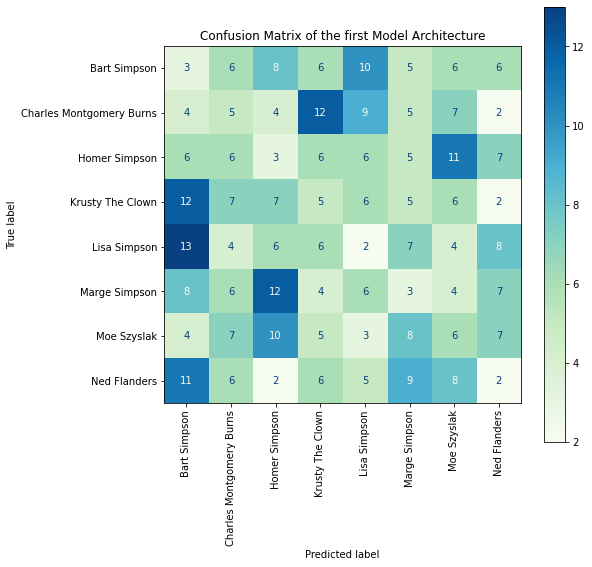

In [240]:
cm = confusion_matrix(true_labels, prediction_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classification_labels)
disp.plot(cmap=plt.cm.GnBu, xticks_rotation='vertical')
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Confusion Matrix of the first Model Architecture")
plt.show()

## Discussion


## Architecture 2 (overfitted)
### Tasks

* [ ] Change number of layers, filters (=kernels), number of neurons
* [ ] Make network too complex (overfitting)
* [ ] Plot learning curves 
* [ ] Plot confusion matrix
* [ ] Discussion

In [218]:
tf.config.list_physical_devices()
tf.debugging.set_log_device_placement(True)

## Architecture 2 (optimized)
### Tasks
* [ ] Add dropout layer
* [ ] add L2 regularization to at least one layer [Weight Regularization](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization)
* [ ] K-fold cross-validation (k >= 5) to find optimal L2 regularization parameter value

In [219]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal', input_shape=input_shape),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

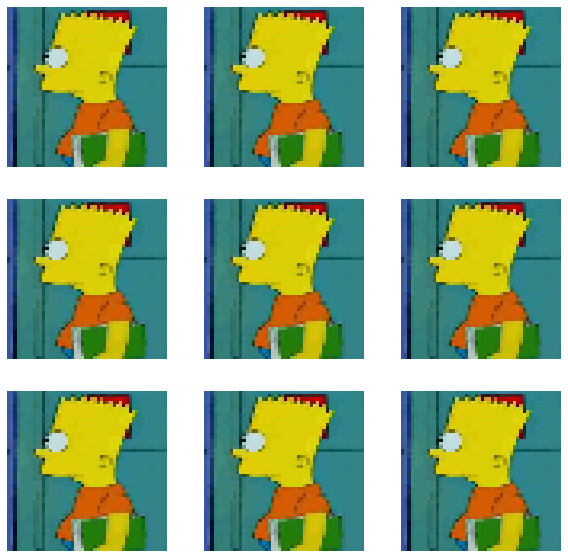

In [221]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

plt.show()

In [225]:
model = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1/.255, input_shape=input_shape),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, name='outputs'),
])

In [226]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [227]:
model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_73 (Sequential)  (None, 50, 50, 3)         0         
                                                                 
 rescaling_7 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_116 (Conv2D)         (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 25, 25, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_117 (Conv2D)         (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_117 (MaxPooli  (None, 12, 12, 128)      0         
 ng2D)                                               

In [228]:
epochs = 10
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs
)

model.save('model_2-optimized.h5')

Epoch 1/10
289/289 [==============================] - 61s 199ms/step - loss: 9.5924 - accuracy: 0.3956 - val_loss: 1.4114 - val_accuracy: 0.5258
Epoch 2/10
289/289 [==============================] - 54s 188ms/step - loss: 1.2638 - accuracy: 0.5476 - val_loss: 1.1701 - val_accuracy: 0.5990
Epoch 3/10
289/289 [==============================] - 54s 188ms/step - loss: 1.0767 - accuracy: 0.6231 - val_loss: 1.2080 - val_accuracy: 0.6129
Epoch 4/10
289/289 [==============================] - 54s 187ms/step - loss: 0.9662 - accuracy: 0.6600 - val_loss: 0.9616 - val_accuracy: 0.6857
Epoch 5/10
289/289 [==============================] - 54s 188ms/step - loss: 0.8669 - accuracy: 0.6945 - val_loss: 1.1188 - val_accuracy: 0.6415
Epoch 6/10
289/289 [==============================] - 55s 191ms/step - loss: 0.7800 - accuracy: 0.7285 - val_loss: 0.8451 - val_accuracy: 0.7031
Epoch 7/10
289/289 [==============================] - 55s 189ms/step - loss: 0.7079 - accuracy: 0.7553 - val_loss: 0.7488 - val_ac

In [ ]:
def load_model(model_path):
    # Recreate the exact same model, including its weights and the optimizer
    new_model = tf.keras.models.load_model(model_path)

    # Show the model architecture
    new_model.summary()

    return new_model

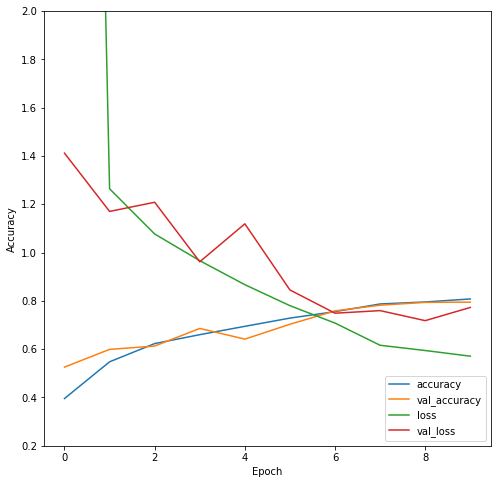

In [229]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 2])
plt.legend(loc='lower right')

In [230]:
probability_model = tf.keras.Sequential([model, layers.Softmax()])
prediction_labels = probability_model.predict(test_data, verbose=2)

prediction_labels = np.array([np.argmax(x) for x in prediction_labels])
true_labels = np.concatenate([y for x, y in test_data], axis=0)

13/13 - 0s - 490ms/epoch - 38ms/step


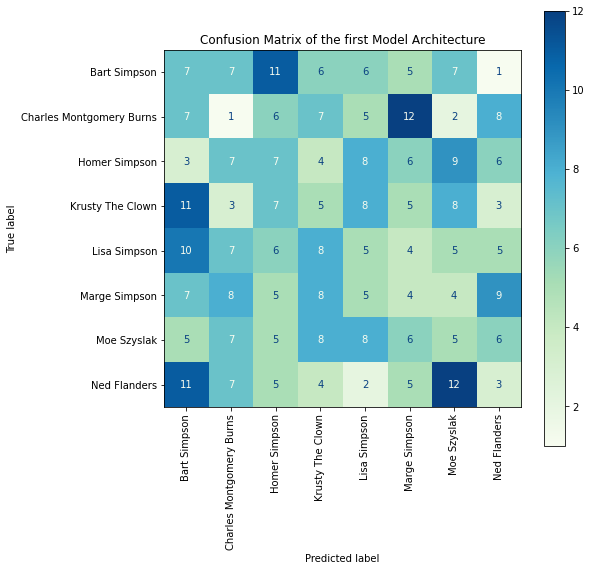

In [231]:
cm = confusion_matrix(true_labels, prediction_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classification_labels)
disp.plot(cmap=plt.cm.GnBu, xticks_rotation='vertical')
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Confusion Matrix of the first Model Architecture")
plt.show()

## Discussion

* [ ] Observations
* [ ] Draw conclusions



### Comparison

Compare 
* nr of parameters
* nr of epochs
* test performance 

